In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
names = ['Nikola', 'Sara', 'Marko', 'Milica', 'Luka']

In [61]:
#Kreirati novu listu od 1000 imena, iz vektora names na random nacin i prikazati prvih 10 i od 15 dod 20 elementa.

random_names = []
for i in range(1000):
    n = np.random.randint(low = 0, high = len(names))
    random_names.append(names[n])

print('Prvih 10: ', random_names[:10])
print('Od 15. do 20. elementa: ', random_names[15:21])

Prvih 10:  ['Sara', 'Milica', 'Luka', 'Milica', 'Marko', 'Marko', 'Milica', 'Milica', 'Milica', 'Luka']
Od 15. do 20. elementa:  ['Milica', 'Luka', 'Sara', 'Luka', 'Luka', 'Sara']


In [62]:
#Generisati n slucajnih brojeva izmedju 0 i 500 

lis = []
for i in range(1000):
    lis.append(np.random.randint(low = 0, high = 500))

print('Prvih 10: ', lis[:10])
print('Poslednjih 10: ', lis[-10:])

Prvih 10:  [278, 363, 392, 462, 143, 411, 463, 63, 137, 3]
Poslednjih 10:  [284, 236, 486, 338, 479, 31, 470, 265, 150, 328]


In [63]:
# Spajanje 
Names_Lis_DataSet = zip(random_names, lis) 

In [64]:
df = pd.DataFrame(Names_Lis_DataSet)
df.head(10)

,0,1
0,Sara,278
1,Milica,363
2,Luka,392
3,Milica,462
4,Marko,143
5,Marko,411
6,Milica,463
7,Milica,63
8,Milica,137
9,Luka,3


In [16]:
# df.to_csv('Names_Lis_DataSet.txt', index = False, header = False) #ako nema header false stavlja prvi red kao naziv
# df = pd.read_csv('Names_Lis_DataSet.txt')

In [65]:
df.head()

,0,1
0,Sara,278
1,Milica,363
2,Luka,392
3,Milica,462
4,Marko,143


In [66]:
df.tail()

,0,1
995,Luka,31
996,Sara,470
997,Marko,265
998,Sara,150
999,Luka,328


In [67]:
df.columns = ['Name', 'Number']
df

,Name,Number
0,Sara,278
1,Milica,363
2,Luka,392
3,Milica,462
4,Marko,143
...,...,...
995,Luka,31
996,Sara,470
997,Marko,265
998,Sara,150


In [68]:
print(df.shape)

(1000, 2)


In [ ]:
# PRIPREMA PODATAKA

In [69]:
print(pd.unique(df['Name']))

['Sara' 'Milica' 'Luka' 'Marko' 'Nikola']


In [70]:
indexes_to_drop = df.loc[df['Number'] == 0].index #imena vrsta koje treba izbaciti
print(indexes_to_drop.values)
df.drop(indexes_to_drop, axis = 0, inplace = True) # axis 0 odosi se na vrste koje zelimo da izbaicmo axis=1 odnosi se na kolone. Ako je inplace= True direktno radi na df
print(df.shape)

[120 679]
(998, 2)


In [72]:
names = df.groupby('Name')
df = names.sum()
df

,Number
Name,
Luka,49326
Marko,51983
Milica,56264
Nikola,49439
Sara,46734


In [73]:
df.loc['Luka', 'Number']

49326

In [74]:
df['Number']

Name
Luka      49326
Marko     51983
Milica    56264
Nikola    49439
Sara      46734
Name: Number, dtype: int64

In [ ]:
# ANALIZA PODATAKA

In [75]:
value_sorted = np.sort(df['Number'])[-1] #sort od najmanjeg do najveceg [-1]=najveci
index_sorted = np.argsort(df['Number'])[-1] #argsort vraca argument(index)
print('Najpopularnije ime je ', df.index[index_sorted], ' i javlja se ', value_sorted, ' puta.')

Najpopularnije ime je  Milica  i javlja se  56264  puta.


In [ ]:
# PREZENTACIJA PODATAKA

In [76]:
plt.figure(figsize = (16, 8))
df_sort = df.sort_values(by = 'Number')
df_sort.head()

,Number
Name,
Sara,46734
Luka,49326
Nikola,49439
Marko,51983
Milica,56264


<Figure size 1600x800 with 0 Axes>

<AxesSubplot:xlabel='Name'>

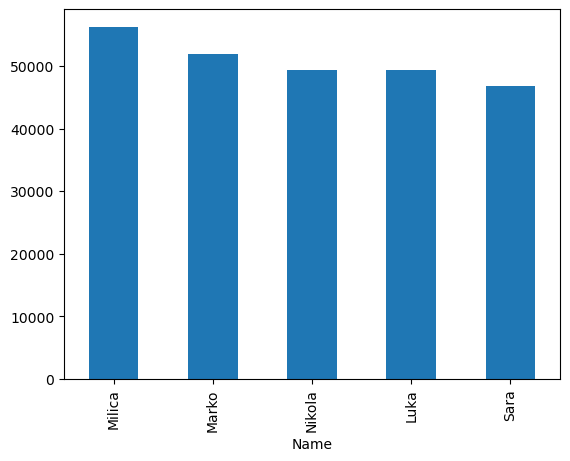

In [77]:
df_sort['Number'][::-1].plot.bar()